# Simple One Hidden Layer Neural Network

Table of Contents
In this lab, you will use a single-layer neural network to classify non linearly seprable data in 1-Ddatabase.

* Neural Network Module and Training Function
* Make Some Data
* Define the Neural Network, Criterion Function, Optimizer, and Train the Model


In [1]:
import torch
import torch.nn as nn
from torch import sigmoid
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

torch.manual_seed(0)


Function for plotting

In [2]:
def PlotStuff(X, Y, model, epoch, leg = True):
    
    plt.plot(X.numpy(), model(X).detach().numpy(), label= ('epoch' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    if leg == True:
        plt.legend()
    else:
        pass

# Neural Network Module and Training Function¶
Define the activations and the output of the first linear layer as an attribute. **Note that this is not good practice.**

In [90]:
# Define the class Net

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        #hidden layer
        self.linear1 = nn.Linear(D_in, H)
        #out put layer
        self.linear2 = nn.Linear(H, D_out)
        # Define the first linear layer as an attribute
        self.a1 = None
        self.l1 =None
        self.l2 = None
        
        
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2 = self.linear2(self.a1)
        yhat = sigmoid(self.linear2(self.a1))
        return yhat
        

# Define the training function

In [91]:
def train(Y, X, model, optimizer, criterion, epochs =1000):
    cost = []
    total =0
    for epoch in range(epochs):
        total = 0
        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.zero_grad()
            #cumulative loss
            total+= loss.item()
        cost.append(total)
        if epoch % 300 ==0:
            PlotStuff(X, Y, model, epoch, leg = True)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    return

# Make Some DAta

In [92]:
X = torch.arange(-20, 20, 1).view(-1,1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

In [93]:
Y

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

# Define the Neural Network, Criterion Function, Optimizer and Train the Model

In [94]:
# Create the Cross-Entropy loss function

In [95]:
# the loss function
def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

Define the Neural Network, Optimizer, and Train the Model:


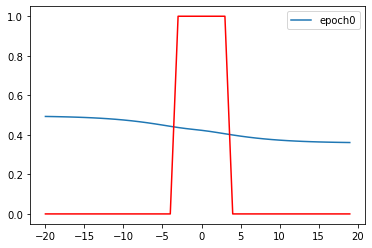

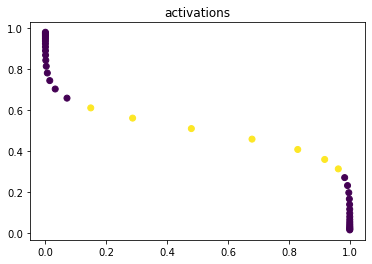

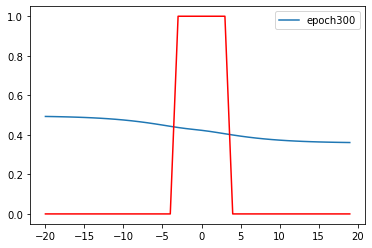

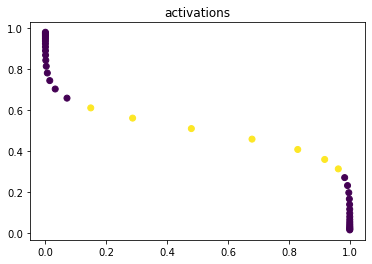

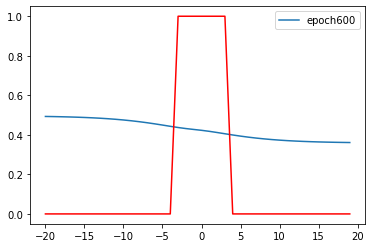

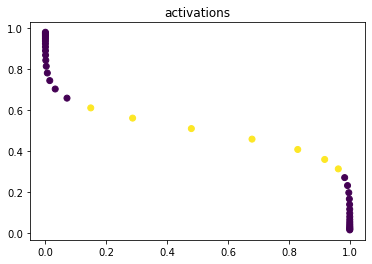

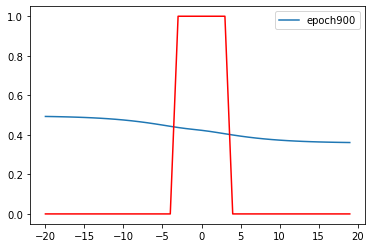

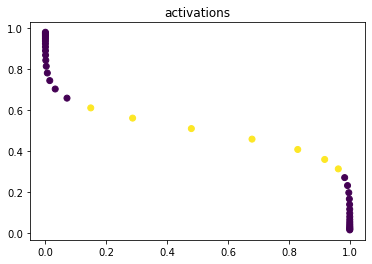

ValueError: x, y, and format string must not be None

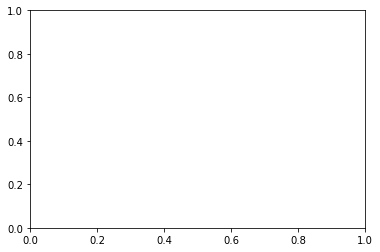

In [96]:
# Train the model
# Size of input

D_in = 1

# hidden layer
H = 2

# number of output
D_out = 1
#Learing rate
learning_rate = 0.1
# create the model
model = Net(D_in, H, D_out)
#optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
#train the model usein
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs = 1000)
#plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')


By examining the output of the activation, you see by the 600th epoch that the data has been mapped to a linearly separable space.

we can make a prediction for a arbitrary one tensors

In [98]:
x = torch.tensor([0.0])
yhat =  model(x)
yhat

tensor([0.4229], grad_fn=<SigmoidBackward>)

 we can make a prediction for some arbitrary one tensors

In [101]:
X_ = torch.tensor([[0.0], [2.0], [3.0]])
Yhat =  model(X_)
Yhat

tensor([[0.4229],
        [0.4118],
        [0.4055]], grad_fn=<SigmoidBackward>)

In [103]:
#SEtting threshold of the prediction
Yhat = Yhat>0.5
Yhat

tensor([[False],
        [False],
        [False]])

# CONTRUCTOR TUTORIAL


In [12]:
#Objects and class

#defining a class

class Computer:
    #attributes i.e variagles and behaviours or methods
    def config(self):
        print('i5 , 16gb, 1TB')
        

com1 = Computer()
com2 = Computer()

print(type(com1))

<class '__main__.Computer'>


In [13]:
com1.config()
com2.config()

i5 , 16gb, 1TB
i5 , 16gb, 1TB


In [11]:
Computer.config(com1)

i5 , 16gb, 1TB


In [31]:
# we use init to initialize

class Computer:
    def __init__(self, cpu, ram):
        self.cpu = cpu
        self.ram = ram 
        print('In init')
        
    def config(self):
        print('Config is ', self.cpu, self.ram)


In [34]:
com1 = Computer('i5 is', 16)
com1.config()

In init
Config is  i5 is 16


# contructor

In [57]:
class Computer:
    def __init__(self):
        self.name = 'Navin'
        self.age = 25
        
    def update(self):
        self.age = 26.5
        
    def compare(self, other):
        if self.age == other.age:
            return True
        else:
            return False

c1 = Computer()
c2 = Computer()

c1.name = 'Tony'
c2.age = 27

if c1.compare(c2):
    print('They are same')
else:
    print('Different')


print(c1.name)
print(c2.name)

Different
Tony
Navin
